## Inspecting Esmeraldas

### Gonzalo Díaz    September 2019

In [1]:
import time
print(time.asctime())

Thu Oct 17 15:48:55 2019


In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

In [3]:
#datadir  = "/home/jrenner/analysis/7431/hdf5/JJ_maps_100_7430_7433/ntuple/trigger2"
#filename = "/ntuple_9040_7431_trigger2_v1.1.0_20190801_bg.h5"

run_number = 7430 
idatadir   = f"/home/hernando/ICAROSNB/JAH/esmes"
ifile      = f"/esmeralda_{run_number}_dspsel_v0.h5"

In [4]:
f = tb.open_file(idatadir + ifile, 'r')
print(f)

/home/hernando/ICAROSNB/JAH/esmes/esmeralda_7430_dspsel_v0.h5 (File) ''
Last modif.: 'Thu Oct 17 15:34:50 2019'
Object Tree: 
/ (RootGroup) ''
/PAOLINA (Group) ''
/PAOLINA/Events (Table(6761,), shuffle, zlib(4)) 'Hits'
/PAOLINA/Summary (Table(32,), shuffle, zlib(4)) 'Event summary information'
/PAOLINA/Tracks (Table(32,), shuffle, zlib(4)) 'Track information'
/RECO (Group) ''
/RECO/Events (Table(24105,), shuffle, zlib(4)) 'Hits'
/Run (Group) ''
/Run/events (Table(32,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(32,), shuffle, zlib(4)) 'run info table'



## RUN

In [5]:
print(f.root.Run._v_children)

{'events': /Run/events (Table(32,), shuffle, zlib(4)) 'event info table'
  description := {
  "evt_number": Int32Col(shape=(), dflt=0, pos=0),
  "timestamp": UInt64Col(shape=(), dflt=0, pos=1)}
  byteorder := 'little'
  chunkshape := (5461,), 'runInfo': /Run/runInfo (Table(32,), shuffle, zlib(4)) 'run info table'
  description := {
  "run_number": Int32Col(shape=(), dflt=0, pos=0)}
  byteorder := 'little'
  chunkshape := (16384,)}


In [6]:
to_df(f.root.Run.events.read())

,evt_number,timestamp
0,77557,1565278381730
1,544402,1565293046751
2,544107,1565293037468
3,466802,1565290609219
4,699707,1565297912576
5,777551,1565300351521
6,1166119,1565312519275
7,1399548,1565319838803
8,1476941,1565322261796
9,1477278,1565322272449


In [7]:
to_df(f.root.Run.runInfo.read())

,run_number
0,7430
1,7430
2,7430
3,7430
4,7430
5,7430
6,7430
7,7430
8,7430
9,7430


## Paolina

In [8]:
print(f.root.PAOLINA._v_children)

{'Events': /PAOLINA/Events (Table(6761,), shuffle, zlib(4)) 'Hits'
  description := {
  "event": Int32Col(shape=(), dflt=0, pos=0),
  "time": Float64Col(shape=(), dflt=0.0, pos=1),
  "npeak": UInt16Col(shape=(), dflt=0, pos=2),
  "Xpeak": Float64Col(shape=(), dflt=0.0, pos=3),
  "Ypeak": Float64Col(shape=(), dflt=0.0, pos=4),
  "nsipm": UInt16Col(shape=(), dflt=0, pos=5),
  "X": Float64Col(shape=(), dflt=0.0, pos=6),
  "Y": Float64Col(shape=(), dflt=0.0, pos=7),
  "Xrms": Float64Col(shape=(), dflt=0.0, pos=8),
  "Yrms": Float64Col(shape=(), dflt=0.0, pos=9),
  "Z": Float64Col(shape=(), dflt=0.0, pos=10),
  "Q": Float64Col(shape=(), dflt=0.0, pos=11),
  "E": Float64Col(shape=(), dflt=0.0, pos=12),
  "Qc": Float64Col(shape=(), dflt=0.0, pos=13),
  "Ec": Float64Col(shape=(), dflt=0.0, pos=14),
  "track_id": Int32Col(shape=(), dflt=0, pos=15)}
  byteorder := 'little'
  chunkshape := (606,), 'Summary': /PAOLINA/Summary (Table(32,), shuffle, zlib(4)) 'Event summary information'
  description

In [23]:
df = to_df(f.root.PAOLINA.Events.read())
labels = list(df.columns)
print(labels)

['event', 'time', 'npeak', 'Xpeak', 'Ypeak', 'nsipm', 'X', 'Y', 'Xrms', 'Yrms', 'Z', 'Q', 'E', 'Qc', 'Ec', 'track_id']


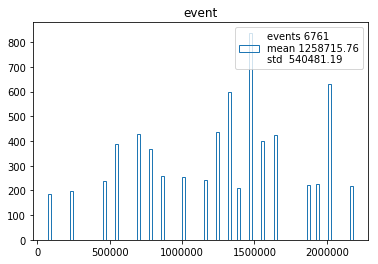

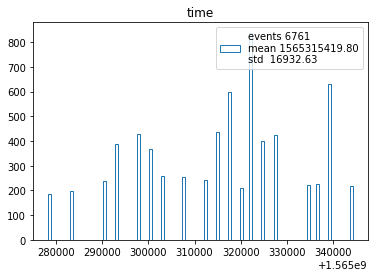

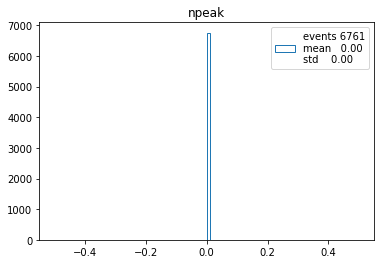

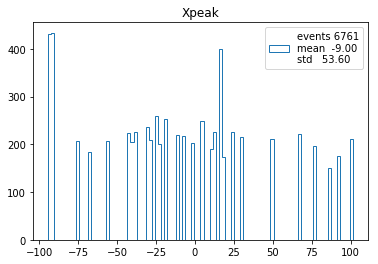

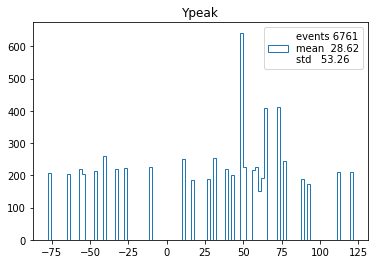

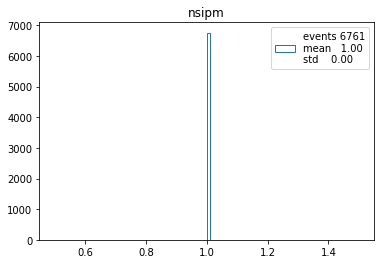

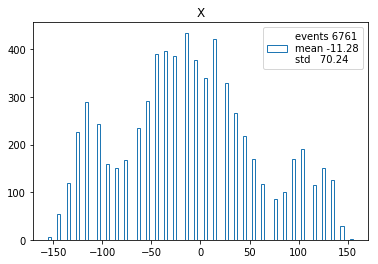

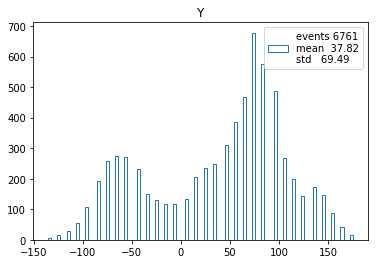

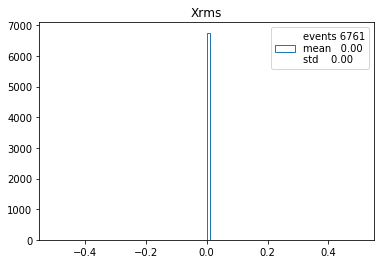

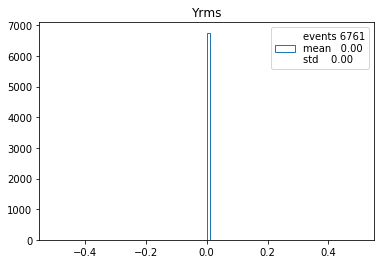

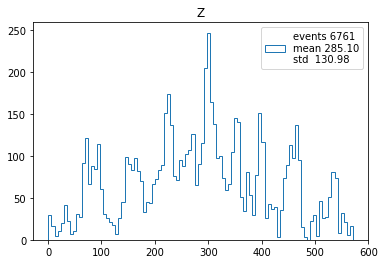

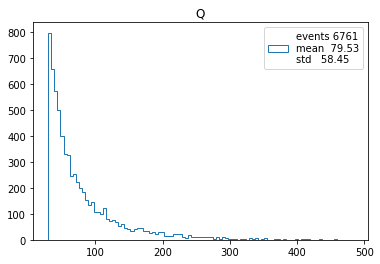

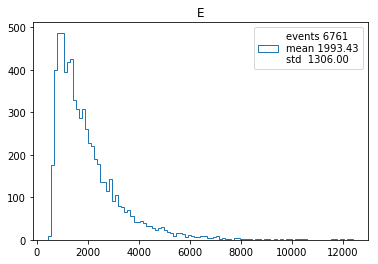

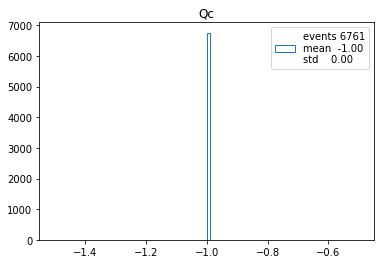

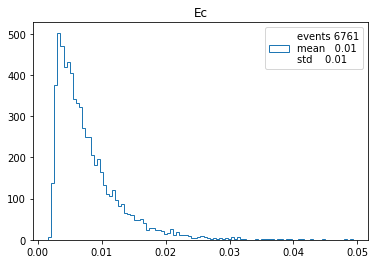

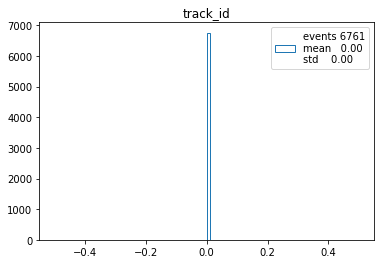

In [24]:
for label in labels:
    hist(df[label], title = label)

In [21]:
df = to_df(f.root.PAOLINA.Summary.read())
labels = list(df.columns)
print(labels)

['event', 'time', 'S1e', 'S1t', 'nS2', 'ntrks', 'nhits', 'S2e0', 'S2ec', 'S2q0', 'S2qc', 'x_avg', 'y_avg', 'z_avg', 'r_avg', 'x_min', 'y_min', 'z_min', 'r_min', 'x_max', 'y_max', 'z_max', 'r_max']


In [25]:
def inspect(df):
    labels = list(df.columns)
    print(labels)
    for label in labels:
        hist(df[label], title = label)
    return

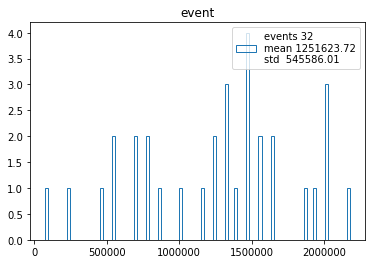

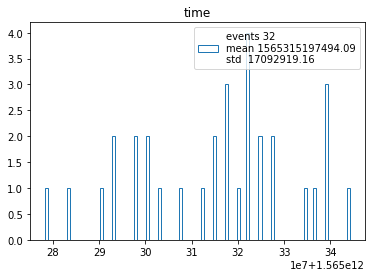

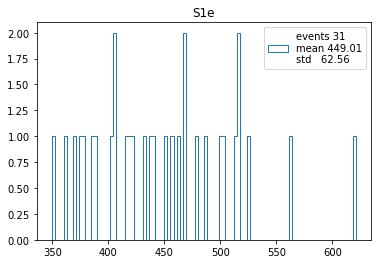

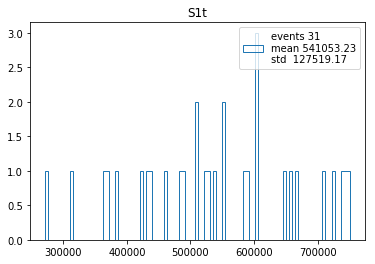

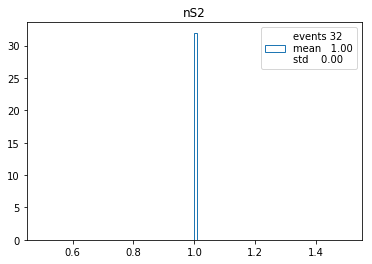

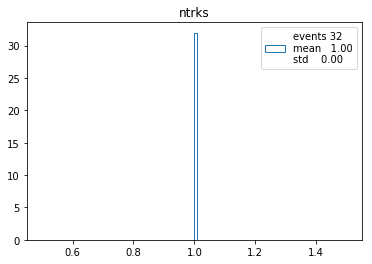

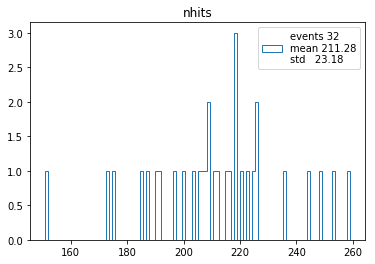

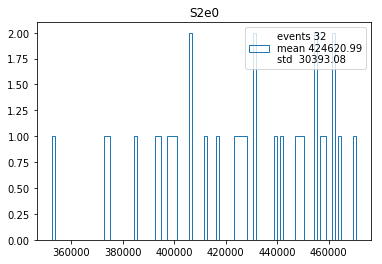

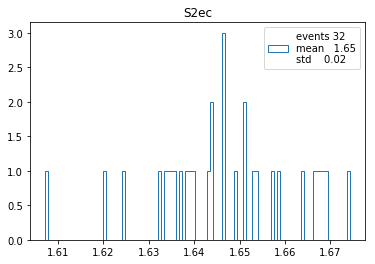

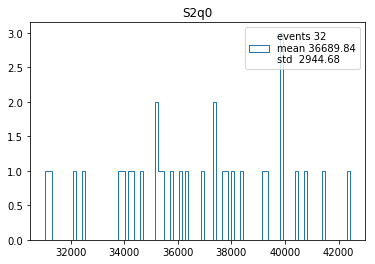

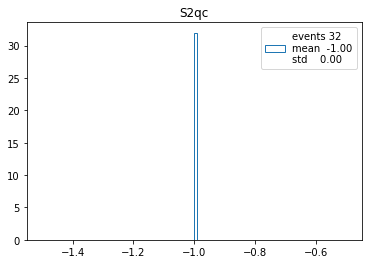

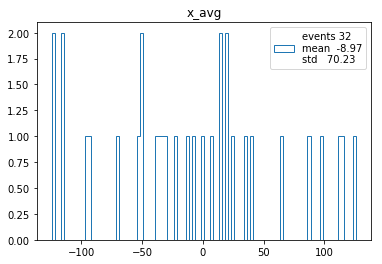

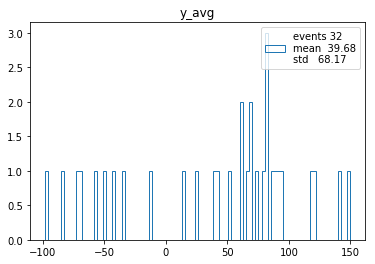

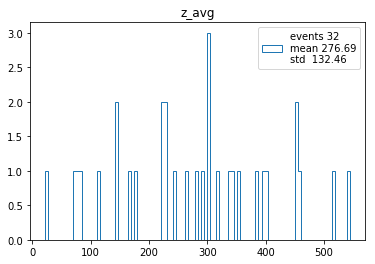

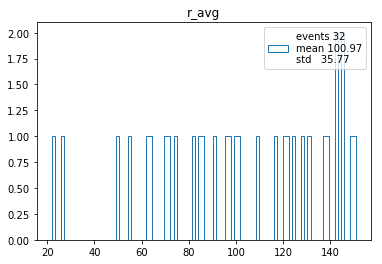

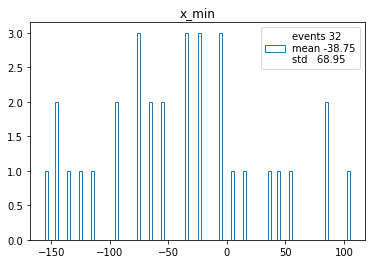

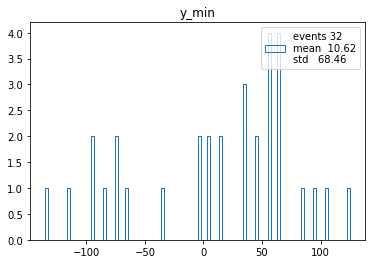

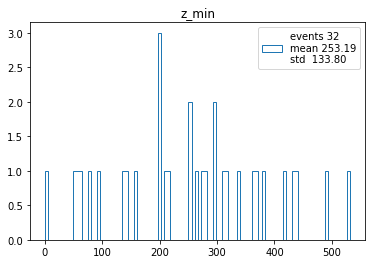

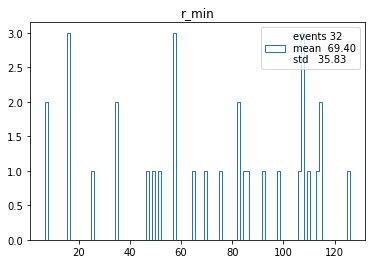

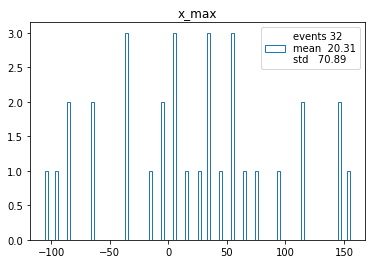

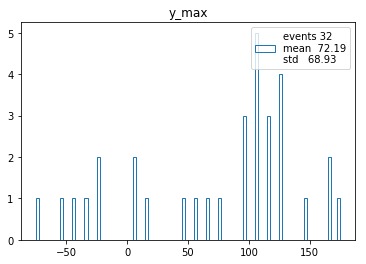

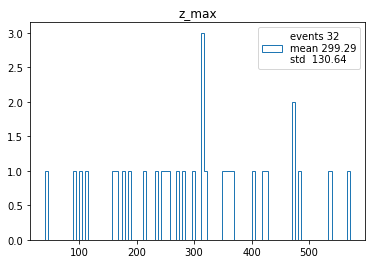

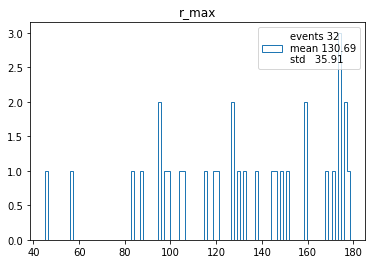

In [22]:
for label in labels:
    hist(df[label], title = label)

['event', 'trackID', 'energy', 'length', 'numb_of_voxels', 'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y', 'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y', 'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x', 'vox_size_y', 'vox_size_z']


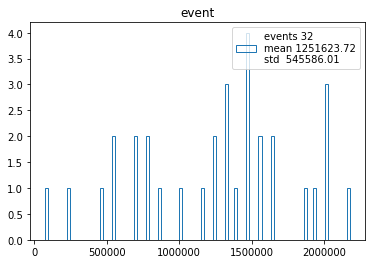

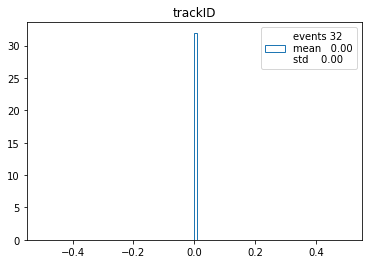

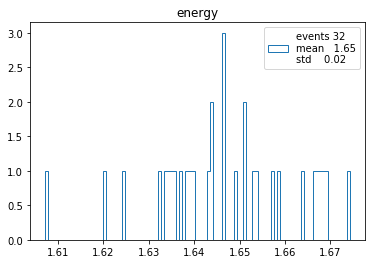

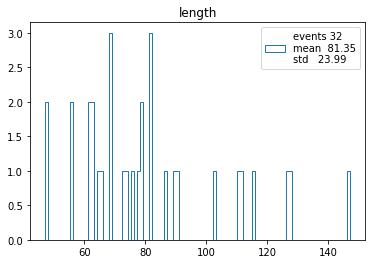

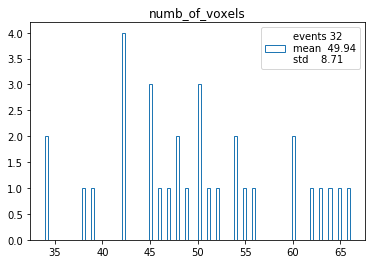

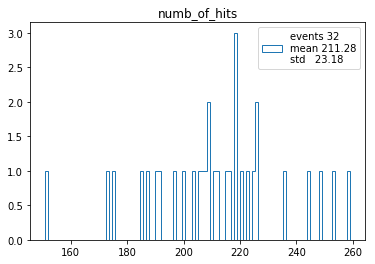

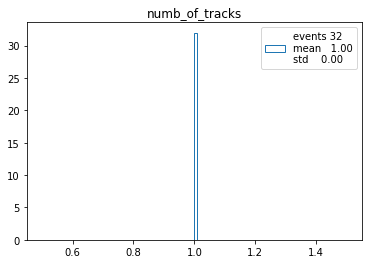

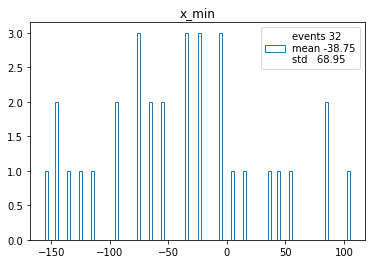

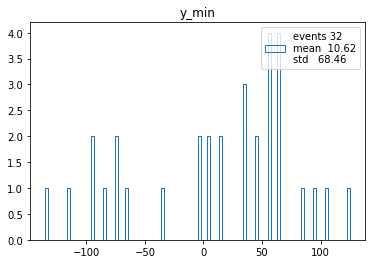

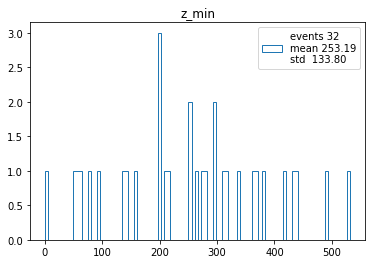

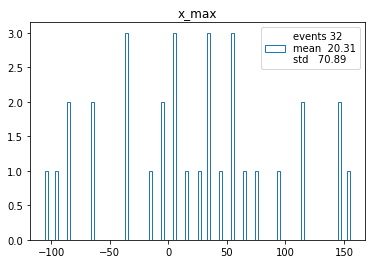

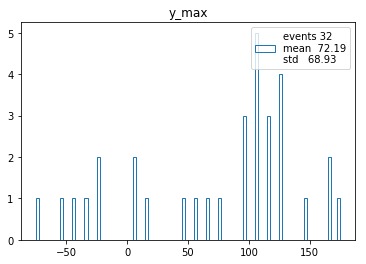

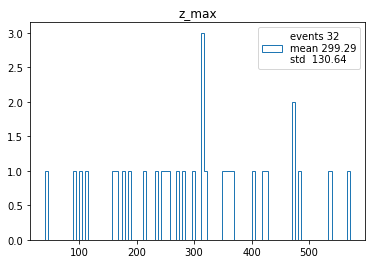

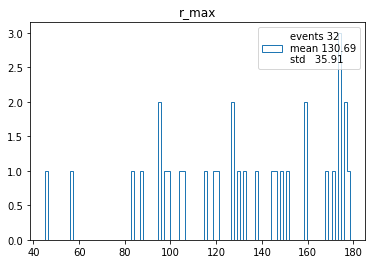

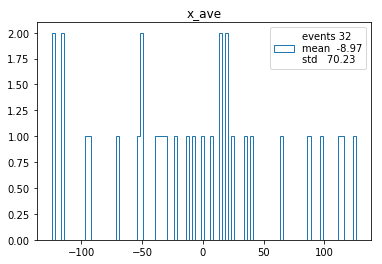

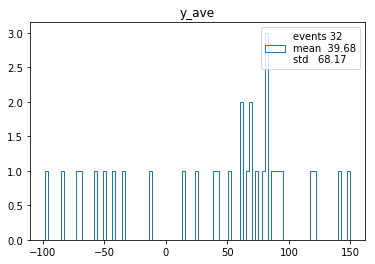

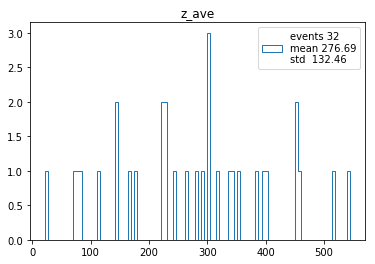

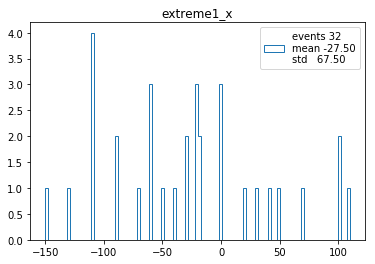

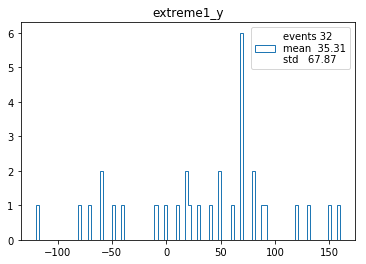

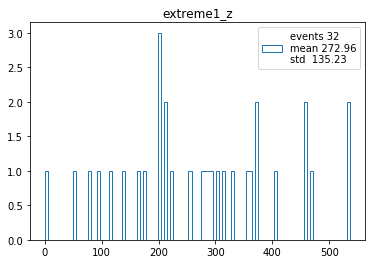

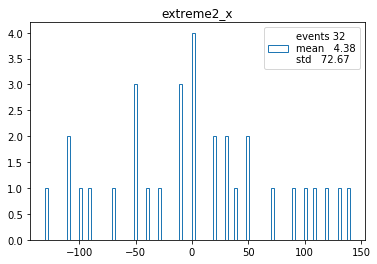

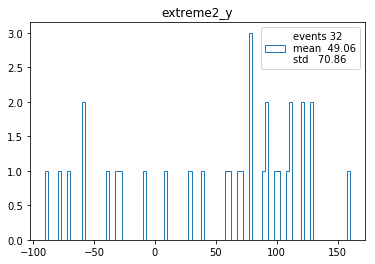

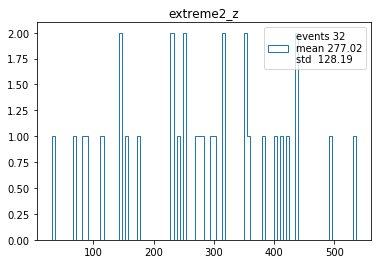

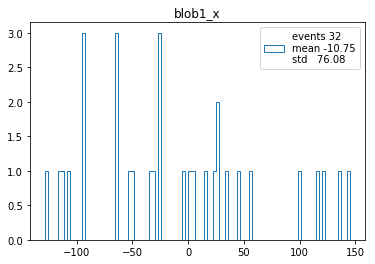

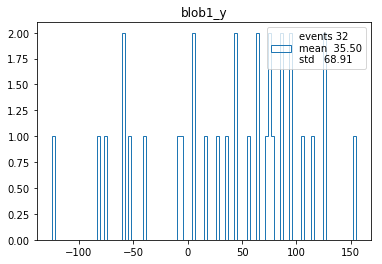

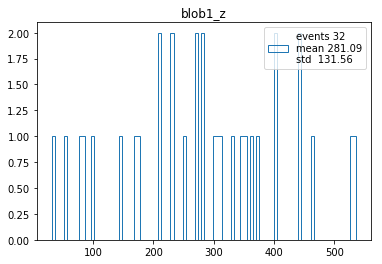

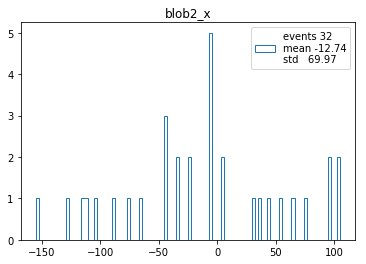

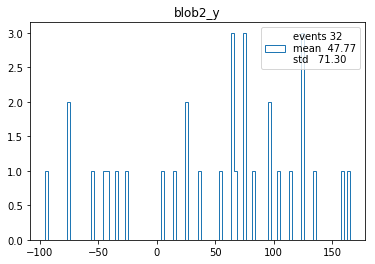

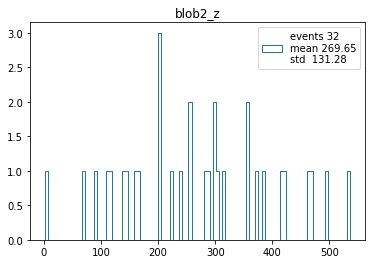

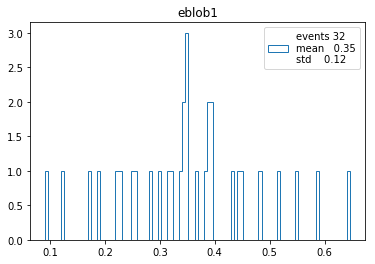

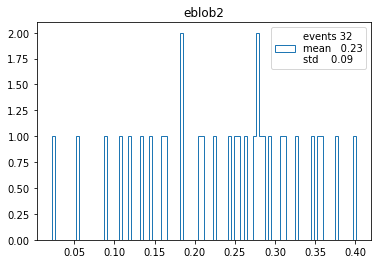

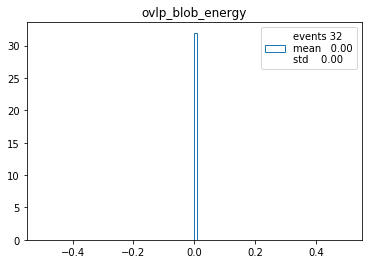

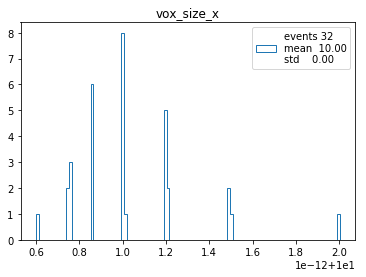

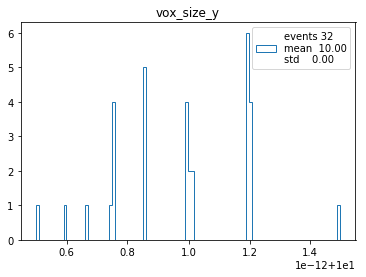

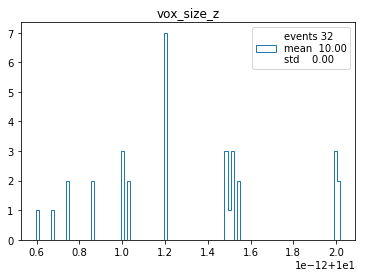

In [26]:
df = to_df(f.root.PAOLINA.Tracks.read())
inspect(df)

## RECO

['event', 'time', 'npeak', 'Xpeak', 'Ypeak', 'nsipm', 'X', 'Y', 'Xrms', 'Yrms', 'Z', 'Q', 'E', 'Qc', 'Ec', 'track_id']


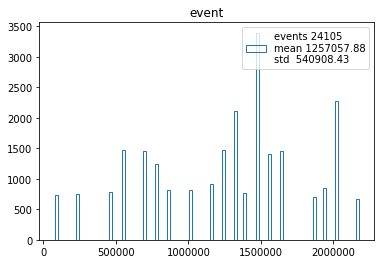

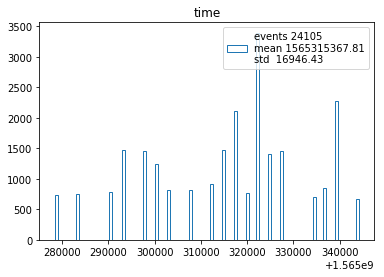

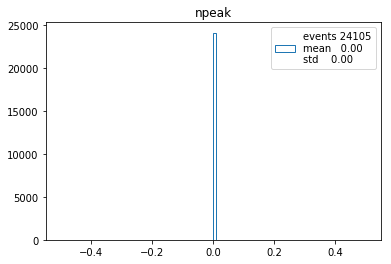

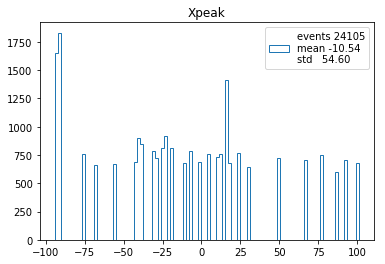

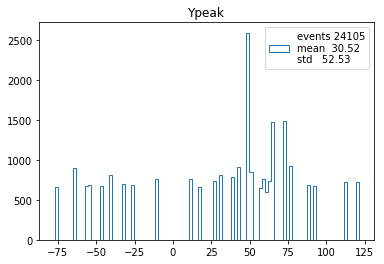

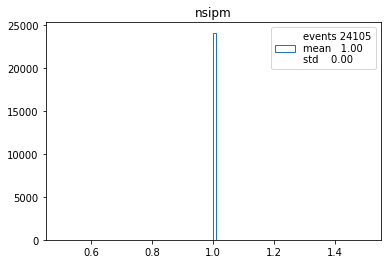

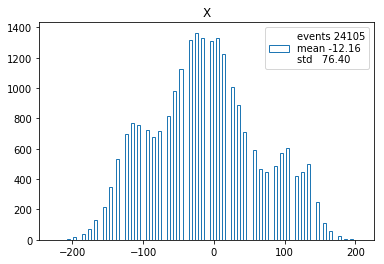

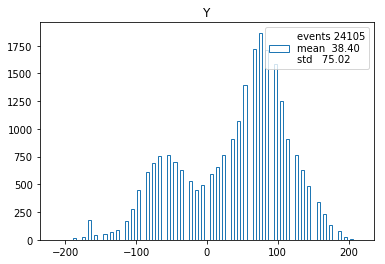

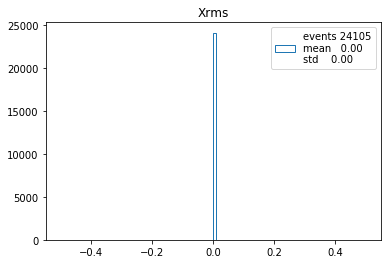

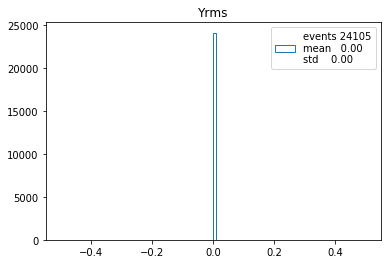

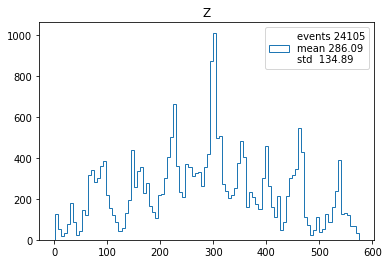

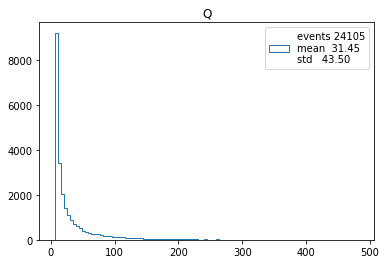

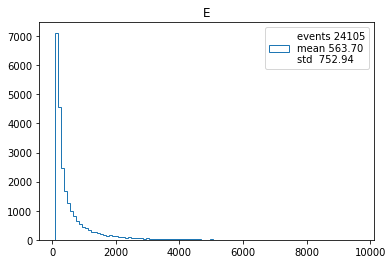

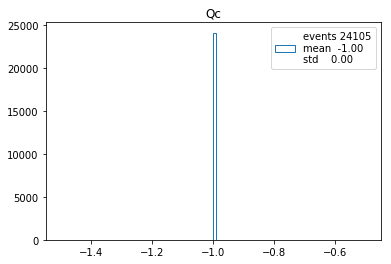

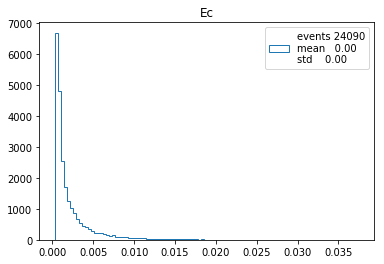

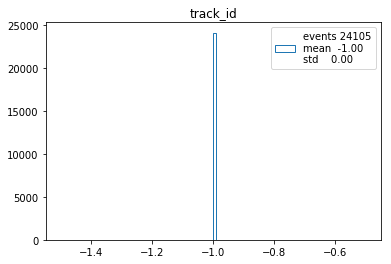

In [28]:
df = to_df(f.root.RECO.Events.read())
inspect(df)

In [ ]:
f.close()